In [1]:
from PIL import Image, ImageCms
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

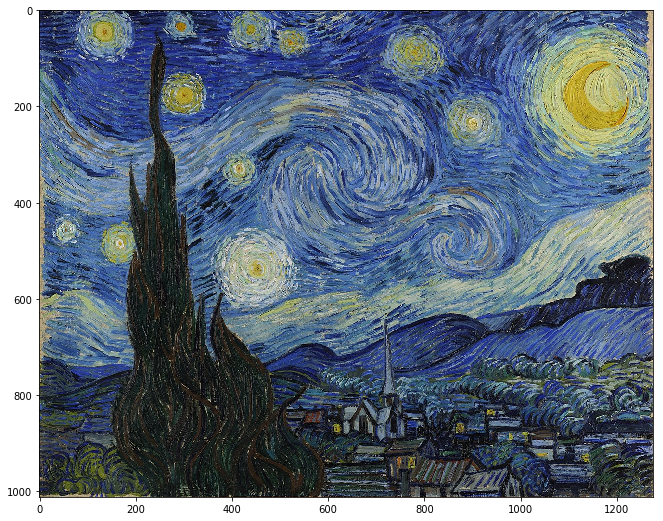

In [2]:
img = Image.open('StarryNight.jpg')
plt.figure(figsize=(11,9))
plt.imshow(img)

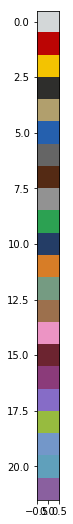

In [3]:
imgCol = Image.open('LegoColours.png')
plt.figure(figsize=(11,9))
plt.imshow(imgCol)

In [4]:
srgb_profile = ImageCms.createProfile("sRGB")
lab_profile  = ImageCms.createProfile("LAB")

rgb2lab_transform = ImageCms.buildTransformFromOpenProfiles(srgb_profile, lab_profile, "RGB", "LAB")

In [5]:
lab_img = ImageCms.applyTransform(img, rgb2lab_transform)
lab_imgCol = ImageCms.applyTransform(imgCol, rgb2lab_transform)

In [6]:
coloursRGB = np.zeros_like(imgCol)
coloursLab = np.zeros_like(lab_imgCol)
for i in range(lab_imgCol.size[1]):
    coloursLab[i] = np.array(lab_imgCol.getpixel((0,i)))
    coloursRGB[i] = np.array(imgCol.getpixel((0,i)))

In [7]:
ReColourLab = np.zeros_like(img) #      Lab approx
ReColourRGB = np.zeros_like(img) #      RGB approx

for i in tqdm(range(lab_img.size[0])):
    for j in range(lab_img.size[1]):
        ReColourLab[j,i] = coloursRGB[np.argmin(np.sqrt(np.sum((lab_img.getpixel((i,j)) - coloursLab[:,0])**2, axis=1)))]
        ReColourRGB[j,i] = coloursRGB[np.argmin(np.sqrt(np.sum((img.getpixel((i,j)) - coloursRGB[:,0])**2, axis=1)))]

100%|██████████████████████████████████████████████████████████████████████████████| 1276/1276 [04:07<00:00,  5.16it/s]


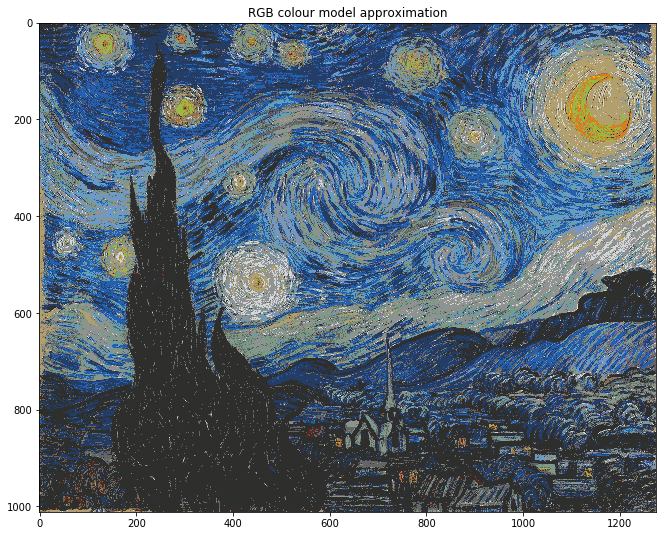

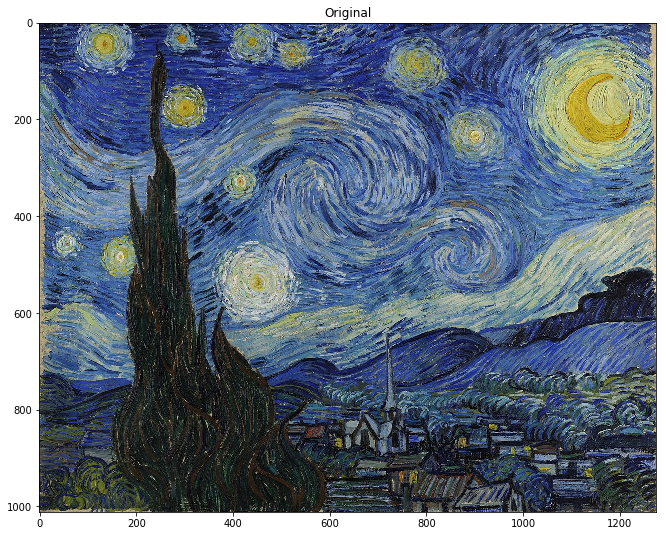

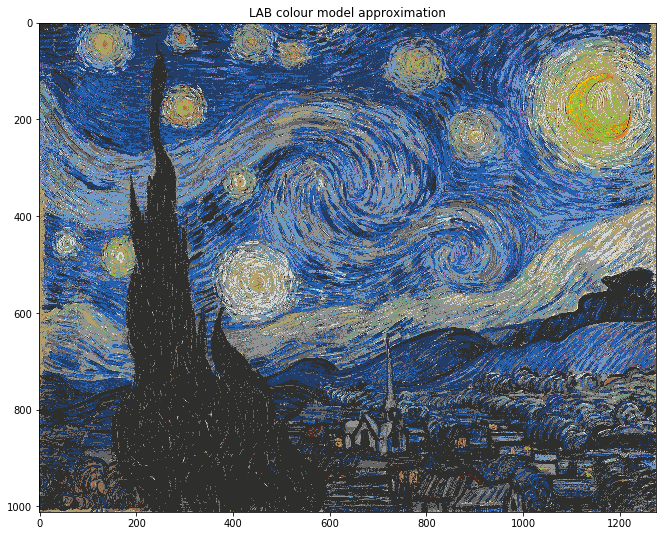

In [8]:
for i in [[ReColourRGB, "RGB colour model approximation"], 
          [img, "Original"], 
          [ReColourLab, "LAB colour model approximation"]]:
    plt.figure(figsize=(33,9))
    plt.title(i[1])
    plt.imshow(i[0])
    plt.show()

In [9]:
imgReColourRGB = Image.fromarray(ReColourRGB, mode = 'RGB')
imgReColourRGB.save("StarryNightRGBApprox.png")
imgReColourLab = Image.fromarray(ReColourLab, mode = 'RGB')
imgReColourLab.save("StarryNightLabApprox.png")